https://towardsdatascience.com/advanced-tutorial-how-to-master-matplotlib-like-an-absolute-boss-aae2d4936734

In [1]:
# wczytanie wykorzystywanych bibliotek
import numpy as np
import pandas as pd
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ustawienia
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 140

#ścieżki
data_path = Path('./data/')
foto_path = Path('./foto/')

E:\Python\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Python\Anaconda\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
E:\Python\Anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Zaczynamy od wykonania wykresu za pomocą figur. Przez figurę mam na myśli klasę najwyższego poziomu w Matplotlib o której możemy myśleć jak o białym płutnie na którym będziemy malować obraz

In [2]:
fig = plt.figure()

<Figure size 840x560 with 0 Axes>

W tym momencie stworzyliśmy figurę i jak widać nie posiada ona Osi (Axes) oraz nie zostala wyświetlona. W drugiej kolejności dodajemy do wykresu osie reprezentujące koordynaty x oraz y. Można to zrobić za pomocą funkcji _add_axes()_ ale w praktyce najczęściej od razu dodajemy jedną lub kilka osi za pomocą funkcji _subplots()_

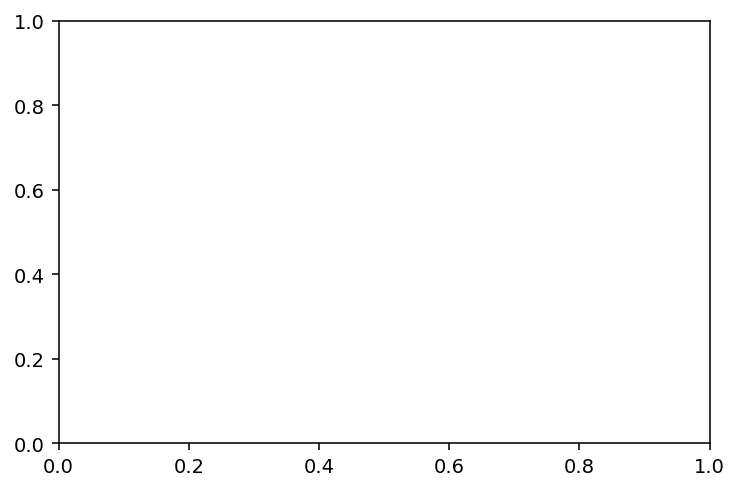

In [3]:
# metoda pierwsza 
ax1 = fig.add_axes()

# metoda najczęściej wykorzystywana
fig, ax = plt.subplots()
#plt.savefig(os.path.join(foto_path, "20_clear_fig.png"),format='png', dpi=300, facecolor="White")

Jak widać po dodaniu osi pojawia się pusty wykres wraz z wyświetlonym układem współżędnym (koordynatami).  
Teraz dodamy do wykresu, a raczej DO OSI elementy wykorzystując metody kreślenia z klasy Axes. Metody te to _scatter_, _bar_, _hist_, _boxplot_


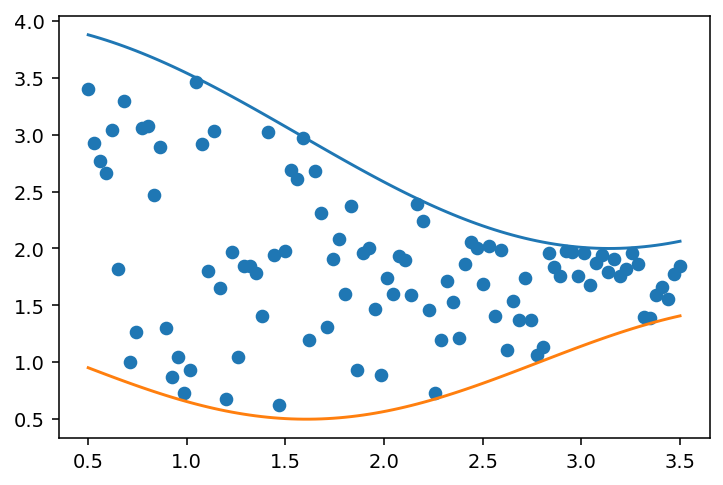

In [44]:
fig, ax = plt.subplots()

# generowanie liczb losowych
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# wykorzystanie metod osi
ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);
#plt.savefig(os.path.join(foto_path, "21_random_data.png"),format='png', dpi=300, facecolor="White")

Wykres wymaga paru korekt:
1. Defaultowe kolory do poprawy
2. Grubość linii oraz wielkość punktów
3. Dodanie opisu osi, tytułu wykresu, legendy, modyfikacja skali itp. 
4. Rozmiar samego rysunku, ustawiony parametr wielkości (zaraz po zaimportowaniu biblioteki) wydaje się przesadnie duży.  

Zatem mamy nasz wykres bazowy a teraz możemy się do niego dobrać i poprawić interesujące nas elementy. Dokładnie, __rozłożymy go na czynniki pierwsze__. 
Aby rozłożyć wykresy na składowe pakiet Matplotlib został wyposarzony w szereg metod rozpoczynających się od prefixu __get\___*. Możemy wyświetlić kilka przykładów korzystając z funkcji __dir()__. 
W poniższym kodzie zapomonamy na chwilę, że posiadamy klasę _axes_ przypisaną do zmiennej ax. Chciałbym się do niej dobrać. W tym celu wyświetlam wszystkie metody tak jak opisałem powyżej:

In [9]:
full_list = dir(fig)
# ograniczam się jedynie do elementów zaczynających się na get
[s for s in full_list if s.startswith("get")]

['get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_axes',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_constrained_layout',
 'get_constrained_layout_pads',
 'get_contains',
 'get_cursor_data',
 'get_default_bbox_extra_artists',
 'get_dpi',
 'get_edgecolor',
 'get_facecolor',
 'get_figheight',
 'get_figure',
 'get_figwidth',
 'get_frameon',
 'get_gid',
 'get_in_layout',
 'get_label',
 'get_linewidth',
 'get_path_effects',
 'get_picker',
 'get_rasterized',
 'get_size_inches',
 'get_sketch_params',
 'get_snap',
 'get_tight_layout',
 'get_tightbbox',
 'get_transform',
 'get_transformed_clip_path_and_affine',
 'get_url',
 'get_visible',
 'get_window_extent',
 'get_zorder']

Na liście znajduje się metoda _get_axes()_. Sprawdźmy co ona potrafi oraz jak możemy z niej skorzystać

In [11]:
help(fig.get_axes)

Help on method get_axes in module matplotlib.figure:

get_axes() method of matplotlib.figure.Figure instance
    Return a list of Axes in the Figure. You can access and modify the
    Axes in the Figure through this list.
    
    Do not modify the list itself. Instead, use `~Figure.add_axes`,
    `~.Figure.add_subplot` or `~.Figure.delaxes` to add or remove an Axes.
    
    Note: This is equivalent to the property `~.Figure.axes`.



In [13]:
lista_osi = fig.get_axes()
lista_osi

[<AxesSubplot:>]

Oficjalna nazwa klasy osi to _AxesSubplot_ i jak widać na liście mamy aktualnie jedynie jeden element z tej klasy. Przypiszmy go do zmiennej

In [15]:
ax0 = lista_osi[0]
ax0 is ax

True

Skoro potrafimy już dobrać się do elementów wykresu, czas na ich dostrojenie do naszych potrzeb za pomocą dostępnych argumentów. No i powstaje kolejne pytanie: skąd mamy wiedzieć jakimi argumentami dysponuje dana klasa/element? I tutaj możemy skorzystać z dostępnej w API PyPlot funkcji _plt.setp()_ (_set parameters_). Zobaczmy zatem jakie parametry akceptuje klasa fig  

In [16]:
plt.setp(fig)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  canvas: FigureCanvas
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  constrained_layout: bool or dict or None
  constrained_layout_pads: unknown
  contains: unknown
  dpi: float
  edgecolor: color
  facecolor: color
  figheight: float
  figure: `.Figure`
  figwidth: float
  frameon: bool
  gid: str
  in_layout: bool
  label: object
  linewidth: number
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  rasterized: bool
  size_inches: (float, float) or float
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  tight_layout: bool or dict with keys "pad", "w_pad", "h_pad", "rect" or None
  transform: `.Transform`
  url: str
  visible: bool
  zorder: float


In [36]:
# możemy teraz podpatrzeć jaką wartość przyjmują poszczególne parametry
print(fig.dpi)
print(plt.getp(fig, "size_inches")) # getp to siostra setp(), służy do wyświetlania akktualnych parametrów

140.0
[5. 3.]


Jeżeli dla przykładu chcemy zmienić rozmiar naszego wykresu, przypiszemy do parametru _size_inches) nowe wartości:

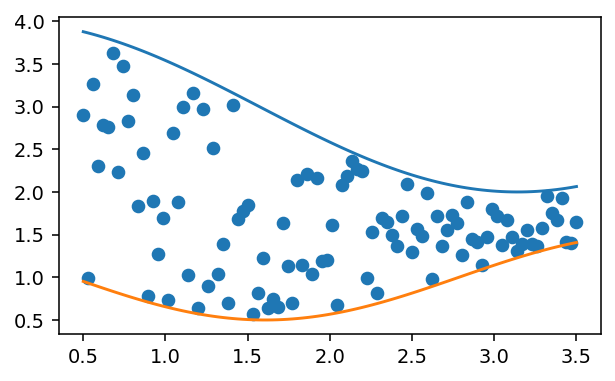

In [33]:
plt.setp(fig, size_inches = (5,3))
fig.get_figure()

Proszę, udało się zmienić rozmiar wykresu. 
Przypiszę teraz kilka parametrow do osi. Najpierw sprawdzę jakie w ogóle mamy możliwości:

In [37]:
plt.setp(ax)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

Dodam do wykresu tytuły osi, tytuł wykresu, zmienię zakres wyświetlanego wykresu

[Text(0.5, 0, 'Nazwa osi x'),
 Text(0, 0.5, 'Nazwa osi y'),
 Text(0.5, 1.0, 'Przykładowa nazwa wykresu'),
 0.0,
 4.0,
 0.0,
 4.5]

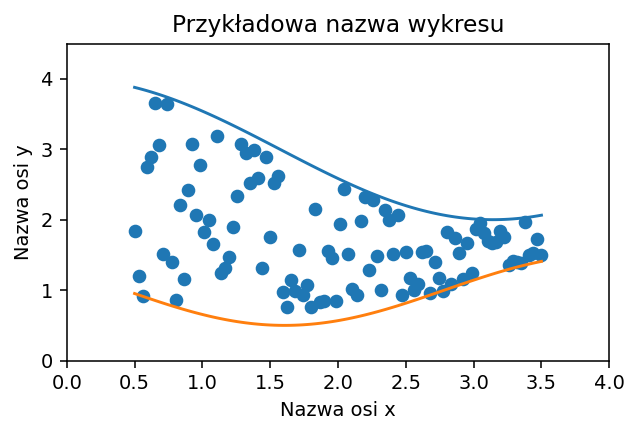

In [69]:
# reszta elementów kodu musi być przeklejona aby 
fig, ax = plt.subplots()

# generowanie liczb losowych
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# wykorzystanie metod osi
ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);

plt.setp(fig, size_inches = (5,3))

plt.setp(
    ax,
    xlabel="Nazwa osi x",
    ylabel="Nazwa osi y",
    title="Przykładowa nazwa wykresu",
    xlim=(0, 4), # zakres wyświetlany na x
    ylim=(0, 4.5)
    )

Pewne klasy, takie jaki osie czy fig, są same w sobie kontenerami innych klas. Jeżeli jakaś klasa nie stwnowi takiego kontenera to jest wówczas klasą pierwotną. 
Sprawdźmy jakimi podklasami dysponuje nasza oś:

In [67]:
ax.get_children()

 Text(0.5, 1.0, 'Przykładowa nazwa wykresu'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Widzimy nasze linie, kropki (PathCollection), oraz ramkę wykresu. Są też osie oraz podmienione wcześniej nazwy. 
Podimenimy kolor kropek dla wykresu scaterplot

In [82]:
#najpierw podglądnijmy jakimi parametrami dysponuje scaterplot
plt.setp(ax.get_children()[1])

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: floa

In [72]:
plt.setp(ax.get_children()[0], edgecolor="red", facecolor="red", sizes=[40])

[None, None, None]

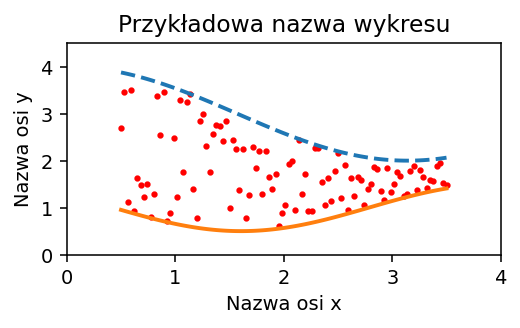

In [83]:
# reszta elementów kodu musi być przeklejona aby 
fig, ax = plt.subplots()

# generowanie liczb losowych
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# wykorzystanie metod osi
ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);

plt.setp(fig, size_inches = (4,2))
plt.setp(ax.get_children()[0], edgecolor="red", facecolor="red", sizes=[5])
# przy okazji nieco powiększę 
plt.setp(ax.get_children()[1], lw=2, ls="--")
plt.setp(ax.get_children()[2], lw=2)


plt.setp(
    ax,
    xlabel="Nazwa osi x",
    ylabel="Nazwa osi y",
    title="Przykładowa nazwa wykresu",
    xlim=(0, 4), # zakres wyświetlany na x
    ylim=(0, 4.5)
    );  # dodanie średnika powoduje, że ten element nie jest wyświetlany

In [ ]:
# i jeszcze podmianka koloru obramowania
for spine in ax.get_children()[3:7]:
    plt.setp(spine, edgecolor="cyan", lw=3)

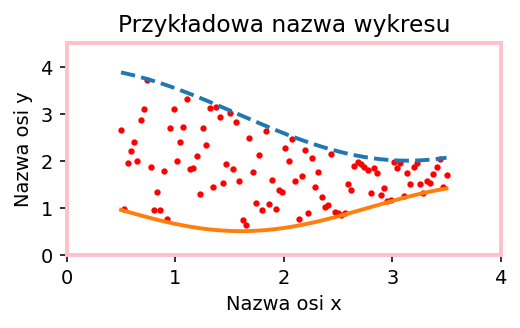

In [85]:
# reszta elementów kodu musi być przeklejona aby 
fig, ax = plt.subplots()

# generowanie liczb losowych
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# wykorzystanie metod osi
ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);

plt.setp(fig, size_inches = (4,2))
plt.setp(ax.get_children()[0], edgecolor="red", facecolor="red", sizes=[5])
# przy okazji nieco powiększę 
plt.setp(ax.get_children()[1], lw=2, ls="--")
plt.setp(ax.get_children()[2], lw=2)

# i jeszcze podmianka koloru obramowania
for spine in ax.get_children()[3:7]:
    plt.setp(spine, edgecolor="pink", lw=2)

plt.setp(
    ax,
    xlabel="Nazwa osi x",
    ylabel="Nazwa osi y",
    title="Przykładowa nazwa wykresu",
    xlim=(0, 4), # zakres wyświetlany na x
    ylim=(0, 4.5)
    );  # dodanie średnika powoduje, że ten element nie jest wyświetlany

na sam koniec, pracując w ten sposób dobrze jest przypisywać wszystkie składowe wykresu do zmiennych, ułatwi to późniejsze ewentualne modyfikowanie tych obiektów

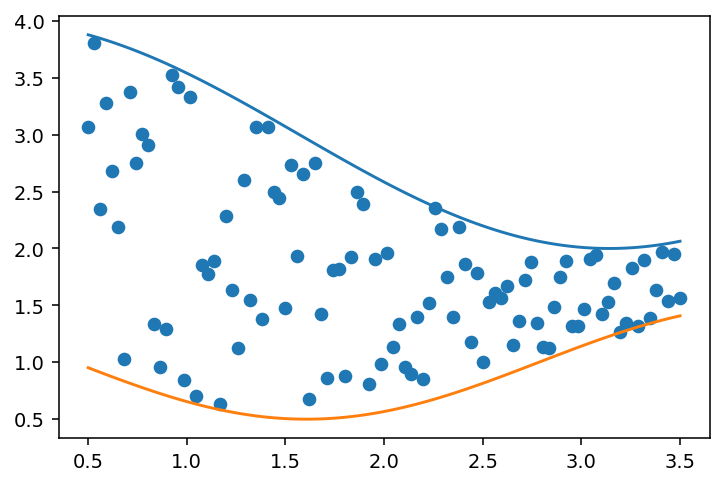

In [86]:
fig, ax = plt.subplots()

# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# Extract into separate variables
dots = ax.scatter(X, Y3)
line1 = ax.plot(X, Y1)
line2 = ax.plot(X, Y2);

In [88]:
dir(dots)
type(dots)

matplotlib.collections.PathCollection

1. Tworzymy podstawowy wykres i skupiamy się na elementach do poprawy. Obiekty te dobrze jest przypisać do zmiennych
2. Dobieramy się do konkretnego elementu. Wywołujemy funkcję __dir()__ jeżeli nie wiemy jak sie nazywają, funkcje z prefiksem _get_*_ również są przydatne na tym etapie.
3. Sprawdzamy za pomoca plt.getp defaultowe parametry naszego komponentu
4. Przypisujemy za pomocą plt.setp interesujące nas wartości parametrów. Tym samym poleceniem możemy najpierw sprawdzić jakie parametry są akceptowalne
5. iterujemy 2-4 do uzyskania idealnego wykresu

Czyli podsumowując całość, __setp__, __getp__ oraz __dir__ to wszystko czego potrzebujemy do poprawy i modyfikowania naszych wykresów w Matplotlib. 